In [74]:
import librosa
from colorsys import rgb_to_hsv, hsv_to_rgb
import music21 as mu
from midi2audio import FluidSynth
import pandas as pd
import numpy as np
import sympy as sp
from IPython.display import HTML, IFrame
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
from IPython.display import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib
import IPython




def create_sound_file_from_midi(m21_data, file_name):
    m21_data.write('midi', fp = file_name + ".mid")
    fs = FluidSynth()
    fs.midi_to_audio('./' + file_name + ".mid", file_name + '.mp3')
    return(IPython.display.Audio("./" + file_name + ".mp3"))



def complementary(r, g, b):
    hsv = rgb_to_hsv(r, g, b)
    return hsv_to_rgb((hsv[0] + 0.5) % 1, hsv[1], hsv[2])







def convertScoreToDF(scoreData = None, scoreName = None, scoreMovement = None):
    # examine the list of parts
    partList = scoreData.getElementsByClass(mu.stream.Part)
    pList = []
    for i in range(0, len(partList)):
        pList.append(partList[i])
        
        
    events = []

    currentNumerator = None
    currentDenominator = None
    currentInstrument = None
    currentInstrumentName = None
    currentPartName = None
    currentTempo = None

    for eachPart in pList:


        for el in eachPart.flatten():
            #print(el)

            eventDictionary = {}
            eventDictionary['offset'] = el.offset
            eventDictionary['quarterLengthDuration'] = el.duration.quarterLength
            eventDictionary['measureNumber'] = el.measureNumber
            eventDictionary['currentNumerator'] = currentNumerator
            eventDictionary['currentDenominator'] = currentDenominator
            eventDictionary['instrumentFamily'] = currentInstrumentName
            eventDictionary['part'] = currentPartName


            currentType = str(type(el))
            
            if currentType == "<class 'music21.tempo.MetronomeMark'>":
                currentTempo = el.number
                eventDictionary['currentTempo'] = currentTempo
            else:
                eventDictionary['currentTempo'] = currentTempo
                

            if currentType == "<class 'music21.meter.base.TimeSignature'>":

                currentNumerator = el.numerator
                currentDenominator = el.denominator

            if "instrument" in currentType:

                currentInstrumentName = el.instrumentName
                currentPartName = el.partName

            if currentType == "<class 'music21.note.Rest'>":
                #print("REST")
                eventDictionary['nameWithOctave'] = "NA"
                eventDictionary['midiNumber'] = -1
                eventDictionary['fullName'] = "Rest"
                eventDictionary['name'] = "NA"
                eventDictionary['octave'] = "NA"
                events.append(eventDictionary)


            if currentType == "<class 'music21.note.Note'>":
                eventDictionary['nameWithOctave'] = el.nameWithOctave
                eventDictionary['midiNumber'] = el.pitches[0].midi
                eventDictionary['fullName'] = el.pitches[0].fullName
                eventDictionary['name'] = el.pitches[0].name
                eventDictionary['octave'] = el.pitches[0].octave
                
#                 if el.tie:
#                     eventDictionary['tieStatus'] = el.tie.type
#                 else:
#                     eventDictionary['tieStatus'] = "NoTie"
                    
                events.append(eventDictionary)
               # print(el)

            elif currentType == "<class 'music21.chord.Chord'>":
      

                for eachNote in el:
                    
                    tempEventDictionary = eventDictionary.copy()
                    tempEventDictionary['partOfChord'] = True
                    tempEventDictionary['nameWithOctave'] = eachNote.nameWithOctave
                    tempEventDictionary['midiNumber'] = eachNote.pitches[0].midi
                    tempEventDictionary['fullName'] = eachNote.pitches[0].fullName
                    tempEventDictionary['name'] = eachNote.pitches[0].name
                    tempEventDictionary['octave'] = eachNote.pitches[0].octave
                    tempEventDictionary['partOfChord'] = True
                    
#                     if eachNote.tie:
#                         tempEventDictionary['tieStatus'] = eachNote.tie.type
#                     else:
#                         tempEventDictionary['tieStatus'] = "NoTie"
                    
                    
                    
                    events.append(tempEventDictionary)
           
                    
    scoreEventData = pd.DataFrame(events)
    scoreEventData['offsetAsFloat'] = scoreEventData['offset'].astype(float)
    scoreEventData['quarterLengthDurationAsFloat'] = scoreEventData.quarterLengthDuration.astype(float)
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(scoreEventData.part)))
    scoreEventData['partColor'] = colors.tolist()
    scoreEventData['scoreName'] = scoreName
    scoreEventData['movement'] = scoreMovement
    
    return(scoreEventData)






In [75]:
#M1 = mu.converter.parse("./MidiAndMusicXMLFiles/MahlerSymphonies/symphony1/MusicXML/1st-movement-Langsam-Schleppend-Immer-sehr-gemachlich.mxl")


In [76]:
#M2 = M1.stripTies()

In [77]:
#M1.measures(1, 50).show('text')

In [78]:
M1Data = convertScoreToDF(M2, "MahlerSym1", 1)

In [79]:
M1Data.head().transpose()

,0,1,2,3,4
offset,0.0,4.0,8.0,12.0,16.0
quarterLengthDuration,4.0,4.0,4.0,4.0,4.0
measureNumber,1,2,3,4,5
currentNumerator,4,4,4,4,4
currentDenominator,4,4,4,4,4
instrumentFamily,Flute,Flute,Flute,Flute,Flute
part,"Flute, Fl�ten I II III IV","Flute, Fl�ten I II III IV","Flute, Fl�ten I II III IV","Flute, Fl�ten I II III IV","Flute, Fl�ten I II III IV"
currentTempo,240.0,62.0,62.0,62.0,62.0
nameWithOctave,NA,NA,NA,NA,NA
midiNumber,-1,-1,-1,-1,-1


In [82]:
M1Data[M1Data.part == 'Contrabasses, Contrabasse']

,offset,quarterLengthDuration,measureNumber,currentNumerator,currentDenominator,instrumentFamily,part,currentTempo,nameWithOctave,midiNumber,fullName,name,octave,partOfChord,offsetAsFloat,quarterLengthDurationAsFloat,partColor,scoreName,movement
38804,0.0,4.0,1,4,4,Contrabasses,"Contrabasses, Contrabasse",200.0,NA,-1,Rest,NA,NA,NaN,0.000000,4.000,"[0.926106, 0.89733, 0.104071, 1.0]",MahlerSym1,1
38805,4.0,4.0,2,4,4,Contrabasses,"Contrabasses, Contrabasse",200.0,A2,45,A-natural in octave 2,A,2,True,4.000000,4.000,"[0.926106, 0.89733, 0.104071, 1.0]",MahlerSym1,1
38806,4.0,4.0,2,4,4,Contrabasses,"Contrabasses, Contrabasse",200.0,A3,57,A-natural in octave 3,A,3,True,4.000000,4.000,"[0.926106, 0.89733, 0.104071, 1.0]",MahlerSym1,1
38807,4.0,4.0,2,4,4,Contrabasses,"Contrabasses, Contrabasse",200.0,A4,69,A-natural in octave 4,A,4,True,4.000000,4.000,"[0.926106, 0.89733, 0.104071, 1.0]",MahlerSym1,1
38808,8.0,28.0,3,4,4,Contrabasses,"Contrabasses, Contrabasse",200.0,A2,45,A in octave 2,A,2,True,8.000000,28.000,"[0.926106, 0.89733, 0.104071, 1.0]",MahlerSym1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39996,1055527/480,0.125,550,2,2,Contrabasses,"Contrabasses, Contrabasse",200.0,NA,-1,Rest,NA,NA,NaN,2199.014583,0.125,"[0.993248, 0.906157, 0.143936, 1.0]",MahlerSym1,1
39997,1055587/480,0.375,550,2,2,Contrabasses,"Contrabasses, Contrabasse",200.0,A2,45,A-natural in octave 2,A,2,NaN,2199.139583,0.375,"[0.993248, 0.906157, 0.143936, 1.0]",MahlerSym1,1
39998,1055767/480,0.5,550,2,2,Contrabasses,"Contrabasses, Contrabasse",200.0,NA,-1,Rest,NA,NA,NaN,2199.514583,0.500,"[0.993248, 0.906157, 0.143936, 1.0]",MahlerSym1,1
39999,1056007/480,2.0,551,2,2,Contrabasses,"Contrabasses, Contrabasse",200.0,D3,50,D-natural in octave 3,D,3,NaN,2200.014583,2.000,"[0.993248, 0.906157, 0.143936, 1.0]",MahlerSym1,1


In [168]:




def createScoreFormatting(ax1, yOffset):
    
    # formatting data
    text_kwargs = dict( fontsize=32, color='white')
    
    keyColorCoords = [((0, 1), 80, 1), ((0, 3), 80, 1), ((0, 6), 80, 1), ((0, 8), 80, 1), ((0, 10), 80, 1), 
                 ((0, 13), 80, 1),((0, 15), 80, 1),((0, 18), 80, 1),((0, 20), 80, 1),((0, 22), 80, 1),
                 ((0, 25), 80, 1), ((0, 27), 80, 1), ((0, 30), 80, 1), ((0, 32), 80, 1), ((0, 34), 80, 1),
                 ((0, 37), 80, 1), ((0, 39), 80, 1), ((0, 42), 80, 1), ((0, 44), 80, 1), ((0, 46), 80, 1),
                 ((0, 49), 80, 1), ((0, 51), 80, 1), ((0, 54), 80, 1), ((0, 56), 80, 1), ((0, 58), 80, 1),
                 ((0, 61), 80, 1), ((0, 63), 80, 1), ((0, 66), 80, 1), ((0, 68), 80, 1), ((0, 70), 80, 1),
                 ((0, 73), 80, 1), ((0, 75), 80, 1), ((0, 78), 80, 1), ((0, 80), 80, 1), ((0, 82), 80, 1),
                 ((0, 85), 80, 1), ((0, 87), 80, 1), ((0, 90), 80, 1), ((0, 92), 80, 1), ((0, 94), 80, 1),
                 ((0, 97), 80, 1), ((0, 99), 80, 1), ((0, 102), 80, 1), ((0, 104), 80, 1), ((0, 106), 80, 1),
                 ((0, 109), 80, 1), ((0, 111), 80, 1), ((5, 114), 80, 1), ((0, 116), 80, 1), ((0, 118), 80, 1)]


    
    # Draw black and white keys
    [ax1.add_patch(Rectangle((keyColorCoords[i][0][0],keyColorCoords[i][0][1] - yOffset), keyColorCoords[i][1], keyColorCoords[i][2], color="#EBECF0", zorder = -10)) for i in range(len(keyColorCoords))]

    ax1.add_patch(Rectangle((74, 0), 10, 80, color = "black"))
    

    return(ax1)


def convertDataForScoreVisualisation(scoreDataAsDF, startMeasure, endMeasure):

    df1 = scoreDataAsDF[(scoreDataAsDF.measureNumber >= startMeasure) & (scoreDataAsDF.measureNumber <= endMeasure) & (scoreDataAsDF.midiNumber != -1)]

    offsetForStart = min(df1.offsetAsFloat)
    minMidiNumber = min(df1.midiNumber)
    maxMidiNumber = max(df1.midiNumber)
   
    df2 = df1[["instrumentFamily", "part","measureNumber", "offsetAsFloat", "midiNumber", "nameWithOctave", "quarterLengthDurationAsFloat", "partColor"]].copy().reset_index()

    df2['height'] = 2
    heightNormalize = df2.groupby(by=["offsetAsFloat", "midiNumber"]).sum().reset_index()[['offsetAsFloat', 'midiNumber', 'height']]
    new_df = pd.merge(df2, heightNormalize,  how='left', left_on=['offsetAsFloat','midiNumber'], right_on = ['offsetAsFloat','midiNumber'])
    df = new_df.sort_values(by = [ "offsetAsFloat", "midiNumber"]).reset_index()
    df["divider"] = df.groupby((df["height_y"]!=df["height_y"].shift()).cumsum()).cumcount() + 1
    df['divider'] = np.where(df.height_y == 1,1, df.divider)
    df['width'] = df.height_x / df.height_y
    
    
    df['adjustedHeightOffset'] = ((df.height_x / df.height_y) * df.divider) - df.width
    
    df['new_col'] = list(zip(df["offsetAsFloat"]-offsetForStart, (df["midiNumber"] - minMidiNumber) + df['adjustedHeightOffset'] ))
    df['col2'] = list(zip(df["new_col"], df["quarterLengthDurationAsFloat"], df["width"], df["partColor"], df['nameWithOctave']))
    

    coords = df.col2.values

    return([coords, minMidiNumber, maxMidiNumber, df])



def createMatPlotLibAxisForScore(ax, x_limit, y_limit):    
    ax.set_xticks(range(int(x_limit)))
    ax.set_yticks(range(int(y_limit)))
    [ax.xaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(x_limit))]
    [ax.yaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(y_limit))]
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(color='k', linestyle='-', linewidth=.5)
    ax.tick_params(axis = "both", which = "both", bottom = False, top = False)
    
    return(ax)



def visualizeScore(scoreData, fromMeasure = None, toMeasure = None, reduce = False):
    
    coords1 = convertDataForScoreVisualisation(scoreData, fromMeasure, toMeasure)

    text_kwargs = dict( fontsize=10, color='white')

    legend_elements = [Line2D([0], [0], color='b', lw=4, label='Violin'),
                       Line2D([0], [0], marker='o', color='w', label='Viola',
                              markerfacecolor='g', markersize=15),
                       Patch(facecolor='orange', edgecolor='r',
                             label='Cello')]



    # DRAW NOTES
    fig, (ax1) = plt.subplots(1, 1, figsize=(45, 20))
   
    
    #plt.figure(dpi = 400)

    ax1 = createMatPlotLibAxisForScore(ax1, 48, (coords1[2] - coords1[1]) + 5)

    t = [ax1.add_patch(Rectangle(coords1[0][i][0], coords1[0][i][1], coords1[0][i][2], color = coords1[0][i][3])) for i in range(len(coords1[0]))]

    u = [ax1.text(coords1[0][j][0][0], coords1[0][j][0][1], coords1[0][j][4], **text_kwargs) for j in range(len(coords1[0]))]


    ax1.legend(handles=legend_elements, loc='upper right')

    f1 = createScoreFormatting(ax1, coords1[1])

In [166]:
data = M1Data[(M1Data.midiNumber != -1) & (M1Data.part == 'Piccolo, Piccolo')][['offsetAsFloat', "midiNumber", 'quarterLengthDurationAsFloat']].head(20)

In [300]:
#M1.measures(2, 20).write('midi', fp = "midi2" + ".mid")

In [83]:
# create custom matplotlib


In [157]:

    
df1 = M1Data[(M1Data.measureNumber >= 0) & (M1Data.measureNumber <= 5) & (M1Data.midiNumber != -1)]

offsetForStart = min(df1.offsetAsFloat)
minMidiNumber = 0
maxMidiNumber = max(df1.midiNumber)

df2 = df1[["instrumentFamily", "part","measureNumber", "offsetAsFloat", "midiNumber", "nameWithOctave", "quarterLengthDurationAsFloat", "partColor"]].copy().reset_index()

# how wide should each row be
df2['height'] = 1
heightNormalize = df2.groupby(by=["offsetAsFloat", "midiNumber"]).sum().reset_index()[['offsetAsFloat', 'midiNumber', 'height']]
new_df = pd.merge(df2, heightNormalize,  how='left', left_on=['offsetAsFloat','midiNumber'], right_on = ['offsetAsFloat','midiNumber'])
df = new_df.sort_values(by = [ "offsetAsFloat", "midiNumber"]).reset_index()
df["divider"] = df.groupby((df["height_y"]!=df["height_y"].shift()).cumsum()).cumcount() + 1
df['divider'] = np.where(df.height_y == 1,1, df.divider)
df['width'] = df.height_x / df.height_y


df['adjustedHeightOffset'] = ((df.height_x / df.height_y) * df.divider) - df.width

df['new_col'] = list(zip(df["offsetAsFloat"]-offsetForStart, (df["midiNumber"] - minMidiNumber) + df['adjustedHeightOffset'] ))
df['col2'] = list(zip(df["new_col"], df["quarterLengthDurationAsFloat"], df["width"], df["partColor"], df['nameWithOctave']))


In [ ]:
# JUST INC 
df2 = df1[["instrumentFamily", "part","measureNumber", "offsetAsFloat", "midiNumber", "nameWithOctave", "quarterLengthDurationAsFloat", "partColor"]].copy().reset_index()
df2['height'] = 1
heightNormalize = df2.groupby(by=["offsetAsFloat", "midiNumber"]).sum().reset_index()[['offsetAsFloat', 'midiNumber', 'height']]
new_df = pd.merge(df2, heightNormalize,  how='left', left_on=['offsetAsFloat','midiNumber'], right_on = ['offsetAsFloat','midiNumber'])
df = new_df.sort_values(by = [ "offsetAsFloat", "midiNumber"]).reset_index()

df['width'] = df.height_x / df.height_y

x = df[df.width <1].reset_index(drop=True)

x["heightInCell"] = x.groupby((x["midiNumber"]!=x["midiNumber"].shift()).cumsum()).cumcount()+1

#df['new_col'] = list(zip(df["offsetAsFloat"], (df["midiNumber"] - minMidiNumber) + df['adjustedHeightOffset'] ))
#df['col2'] = list(zip(df["new_col"], df["quarterLengthDurationAsFloat"], df["width"], df["partColor"], df['nameWithOctave']))

In [301]:
def convertDataForScoreVisualisation(scoreDataAsDF, startMeasure, endMeasure):

    df1 = scoreDataAsDF[(scoreDataAsDF.measureNumber >= startMeasure) & (scoreDataAsDF.measureNumber <= endMeasure) & (scoreDataAsDF.midiNumber != -1)]

    offsetForStart = min(df1.offsetAsFloat)
    minMidiNumber = min(df1.midiNumber)
    maxMidiNumber = max(df1.midiNumber)

    # get needed columns
    df2 = df1[["instrumentFamily", "part","measureNumber", "offsetAsFloat", "midiNumber", "nameWithOctave", "quarterLengthDurationAsFloat", "partColor"]].copy().reset_index()

    # assing a standard hgiht
    df2['height'] = 1

    # find out how many instruments sharing width
    heightNormalize = df2.groupby(by=["offsetAsFloat", "midiNumber"]).sum().reset_index()[['offsetAsFloat', 'midiNumber', 'height']]
    df3 = pd.merge(df2, heightNormalize,  how='left', left_on=['offsetAsFloat','midiNumber'], right_on = ['offsetAsFloat','midiNumber'])


    # Reset and create width of instruments
    df4 = df3.sort_values(by = [ "offsetAsFloat", "midiNumber"]).reset_index()
    df4['width'] = df4.height_x / df4.height_y



    df5 = df4[df4.width == 1].reset_index(drop=True)
    df5["verticalOrder"] = 0
    df5["tempOffsetMidi"] = "NA"
    df5['adjustedHeightOffset'] = 0

    # Select Reset and create offset
    df6 = df4[df4.width <1].reset_index(drop=True)


    df6['tempOffSetMidi'] = df6['offsetAsFloat'].astype(str) + "___" +  df6['midiNumber'].astype(str)
    df6["verticalOrder"] = df6.groupby((df6["tempOffSetMidi"]!=df6["tempOffSetMidi"].shift()).cumsum()).cumcount()+1

    #df6["verticalOrder"] = df6.groupby((df6["midiNumber"]!=df6["midiNumber"].shift()).cumsum()).cumcount()+1

    df6['adjustedHeightOffset'] = (df6.width * df6.verticalOrder) - df6.width

    df7 = pd.concat([df5, df6])


    df7['new_col'] = list(zip(df7["offsetAsFloat"]-offsetForStart, (df7["midiNumber"] - minMidiNumber) + df7['adjustedHeightOffset'] ))
    df7['col2'] = list(zip(df7["new_col"], df7["quarterLengthDurationAsFloat"], df7["width"], df7["partColor"], df7['nameWithOctave']))
    
    
    coords = df7.col2.values

    return([coords, minMidiNumber, maxMidiNumber, df7])

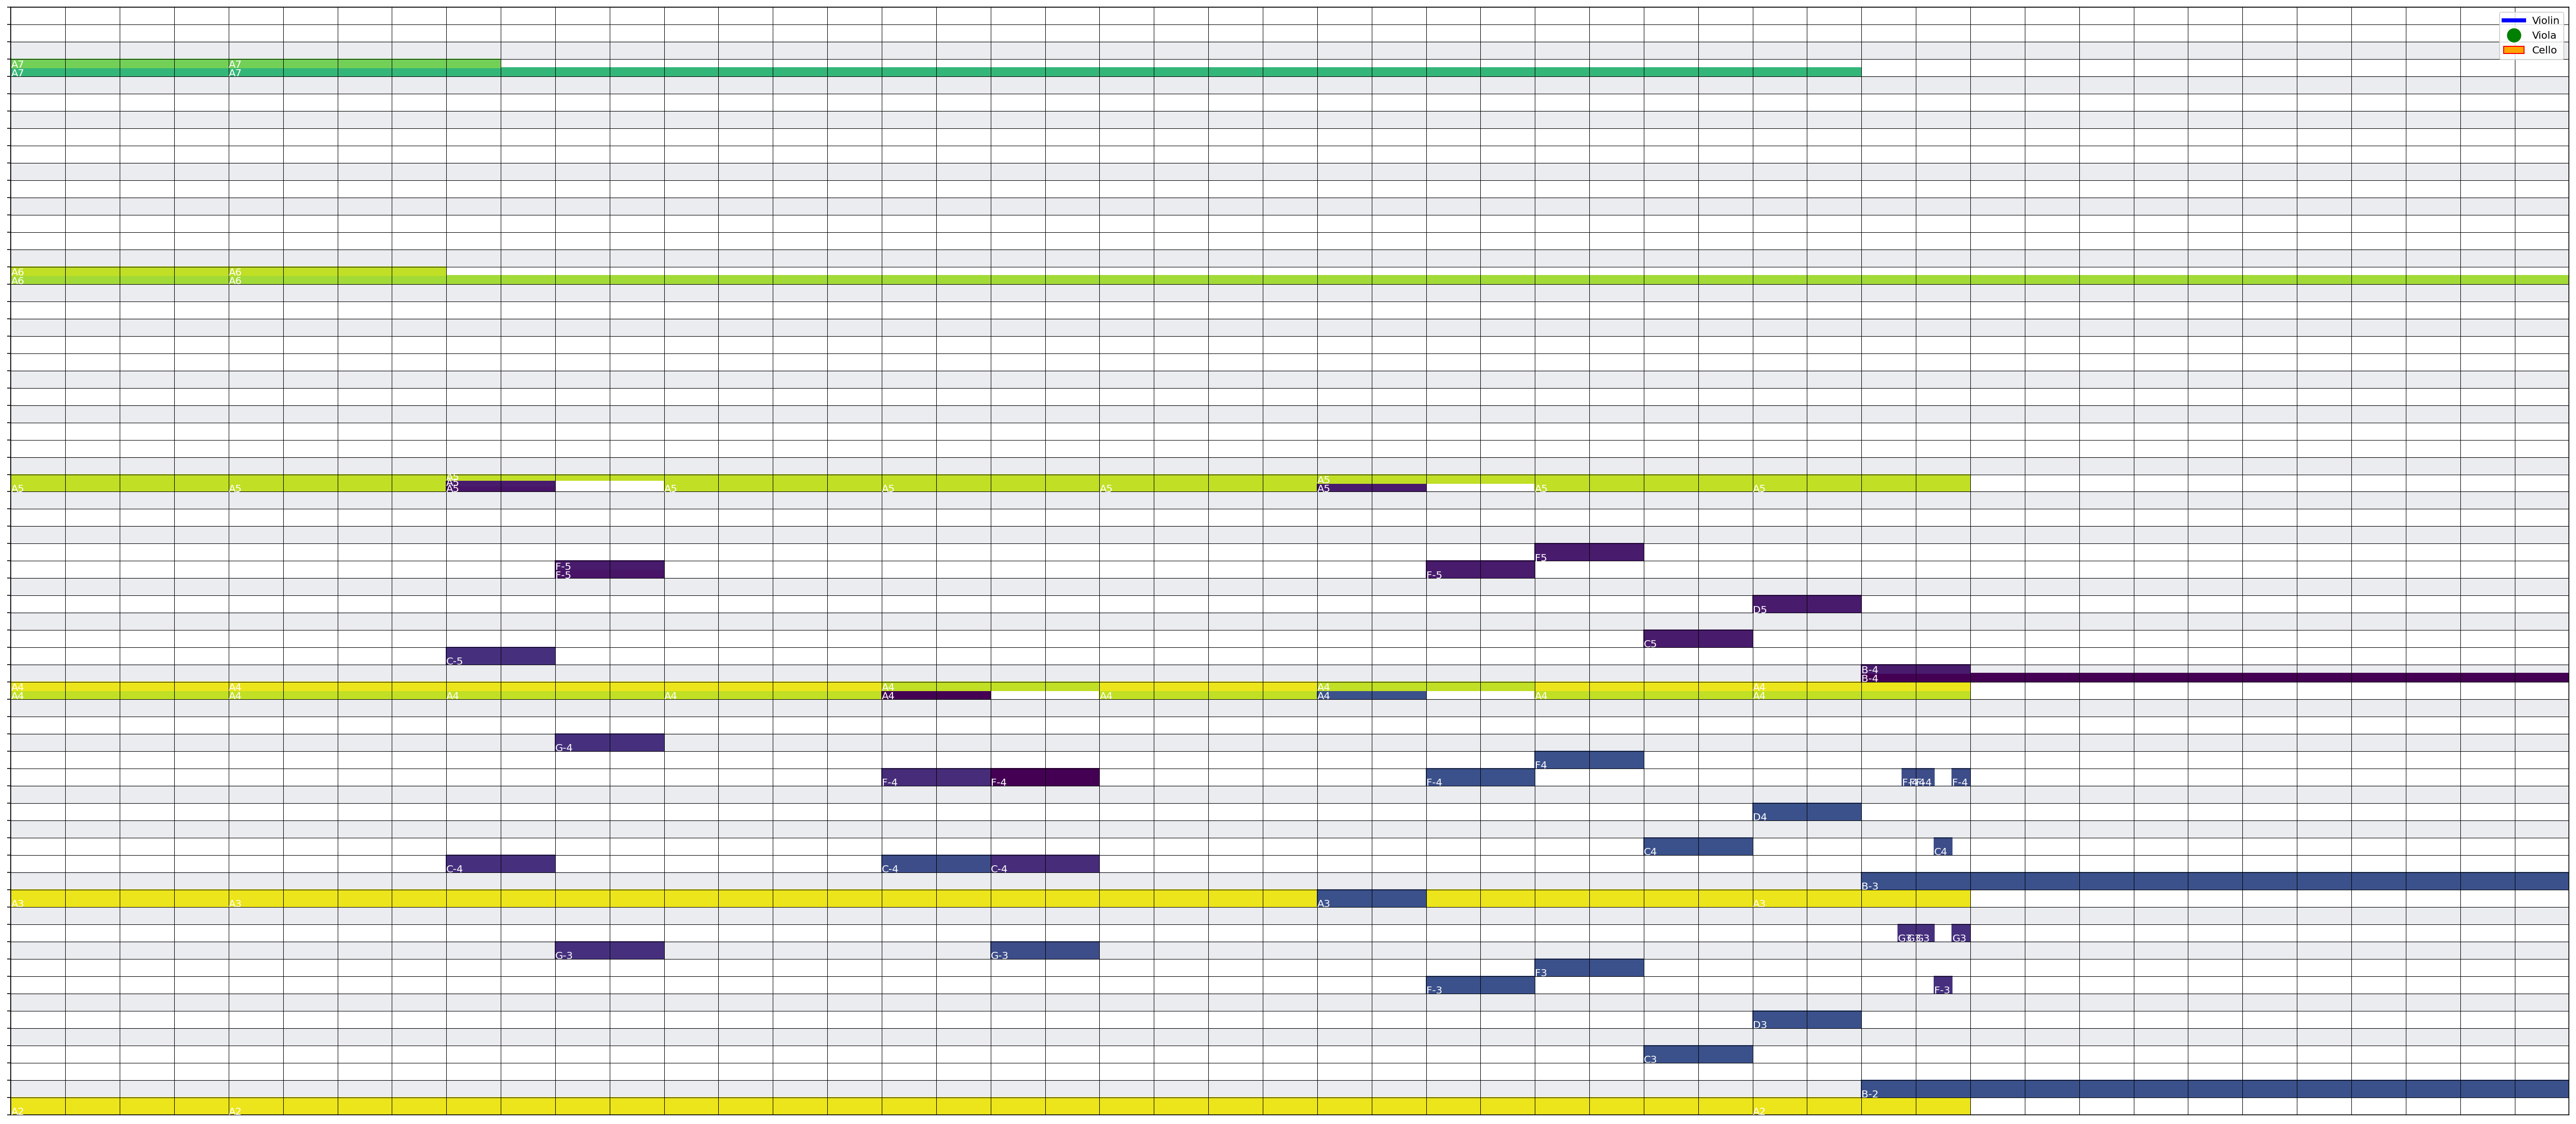

In [303]:
visualizeScore(M1Data, 0, 10)

In [252]:
df6

,level_0,index,instrumentFamily,part,measureNumber,offsetAsFloat,midiNumber,nameWithOctave,quarterLengthDurationAsFloat,partColor,height_x,height_y,width,heightInCell
0,27,36110,Strings,"Strings, Violoncelle",2,4.0,69,A4,4.0,"[0.751884, 0.874951, 0.143228, 1.0]",1,2,0.500000,1
1,44,38807,Contrabasses,"Contrabasses, Contrabasse",2,4.0,69,A4,4.0,"[0.926106, 0.89733, 0.104071, 1.0]",1,2,0.500000,2
2,24,34495,Strings,"Strings, Viola",2,4.0,93,A6,4.0,"[0.636902, 0.856542, 0.21662, 1.0]",1,2,0.500000,1
3,26,36109,Strings,"Strings, Violoncelle",2,4.0,93,A6,4.0,"[0.751884, 0.874951, 0.143228, 1.0]",1,2,0.500000,2
4,20,26552,Strings,"Strings, Violine I",2,4.0,105,A7,4.0,"[0.202219, 0.715272, 0.476084, 1.0]",1,2,0.500000,1
5,22,31514,Strings,"Strings, Violine II",2,4.0,105,A7,4.0,"[0.449368, 0.813768, 0.335384, 1.0]",1,2,0.500000,2
6,30,36113,Strings,"Strings, Violoncelle",3,8.0,69,A4,5.0,"[0.751884, 0.874951, 0.143228, 1.0]",1,2,0.500000,1
7,47,38810,Contrabasses,"Contrabasses, Contrabasse",3,8.0,69,A4,28.0,"[0.926106, 0.89733, 0.104071, 1.0]",1,2,0.500000,2
8,25,34496,Strings,"Strings, Viola",3,8.0,93,A6,60.0,"[0.636902, 0.856542, 0.21662, 1.0]",1,2,0.500000,1
9,29,36112,Strings,"Strings, Violoncelle",3,8.0,93,A6,4.0,"[0.751884, 0.874951, 0.143228, 1.0]",1,2,0.500000,2


In [226]:
x

,level_0,index,instrumentFamily,part,measureNumber,offsetAsFloat,midiNumber,nameWithOctave,quarterLengthDurationAsFloat,partColor,height_x,height_y,width,heightInCell
0,15,36110,Strings,"Strings, Violoncelle",2,4.0,69,A4,4.0,"[0.751884, 0.874951, 0.143228, 1.0]",1,2,0.500000,1
1,26,38807,Contrabasses,"Contrabasses, Contrabasse",2,4.0,69,A4,4.0,"[0.926106, 0.89733, 0.104071, 1.0]",1,2,0.500000,2
2,12,34495,Strings,"Strings, Viola",2,4.0,93,A6,4.0,"[0.636902, 0.856542, 0.21662, 1.0]",1,2,0.500000,1
3,14,36109,Strings,"Strings, Violoncelle",2,4.0,93,A6,4.0,"[0.751884, 0.874951, 0.143228, 1.0]",1,2,0.500000,2
4,8,26552,Strings,"Strings, Violine I",2,4.0,105,A7,4.0,"[0.202219, 0.715272, 0.476084, 1.0]",1,2,0.500000,1
5,10,31514,Strings,"Strings, Violine II",2,4.0,105,A7,4.0,"[0.449368, 0.813768, 0.335384, 1.0]",1,2,0.500000,2
6,18,36113,Strings,"Strings, Violoncelle",3,8.0,69,A4,5.0,"[0.751884, 0.874951, 0.143228, 1.0]",1,2,0.500000,1
7,29,38810,Contrabasses,"Contrabasses, Contrabasse",3,8.0,69,A4,28.0,"[0.926106, 0.89733, 0.104071, 1.0]",1,2,0.500000,2
8,13,34496,Strings,"Strings, Viola",3,8.0,93,A6,60.0,"[0.636902, 0.856542, 0.21662, 1.0]",1,2,0.500000,1
9,17,36112,Strings,"Strings, Violoncelle",3,8.0,93,A6,4.0,"[0.751884, 0.874951, 0.143228, 1.0]",1,2,0.500000,2


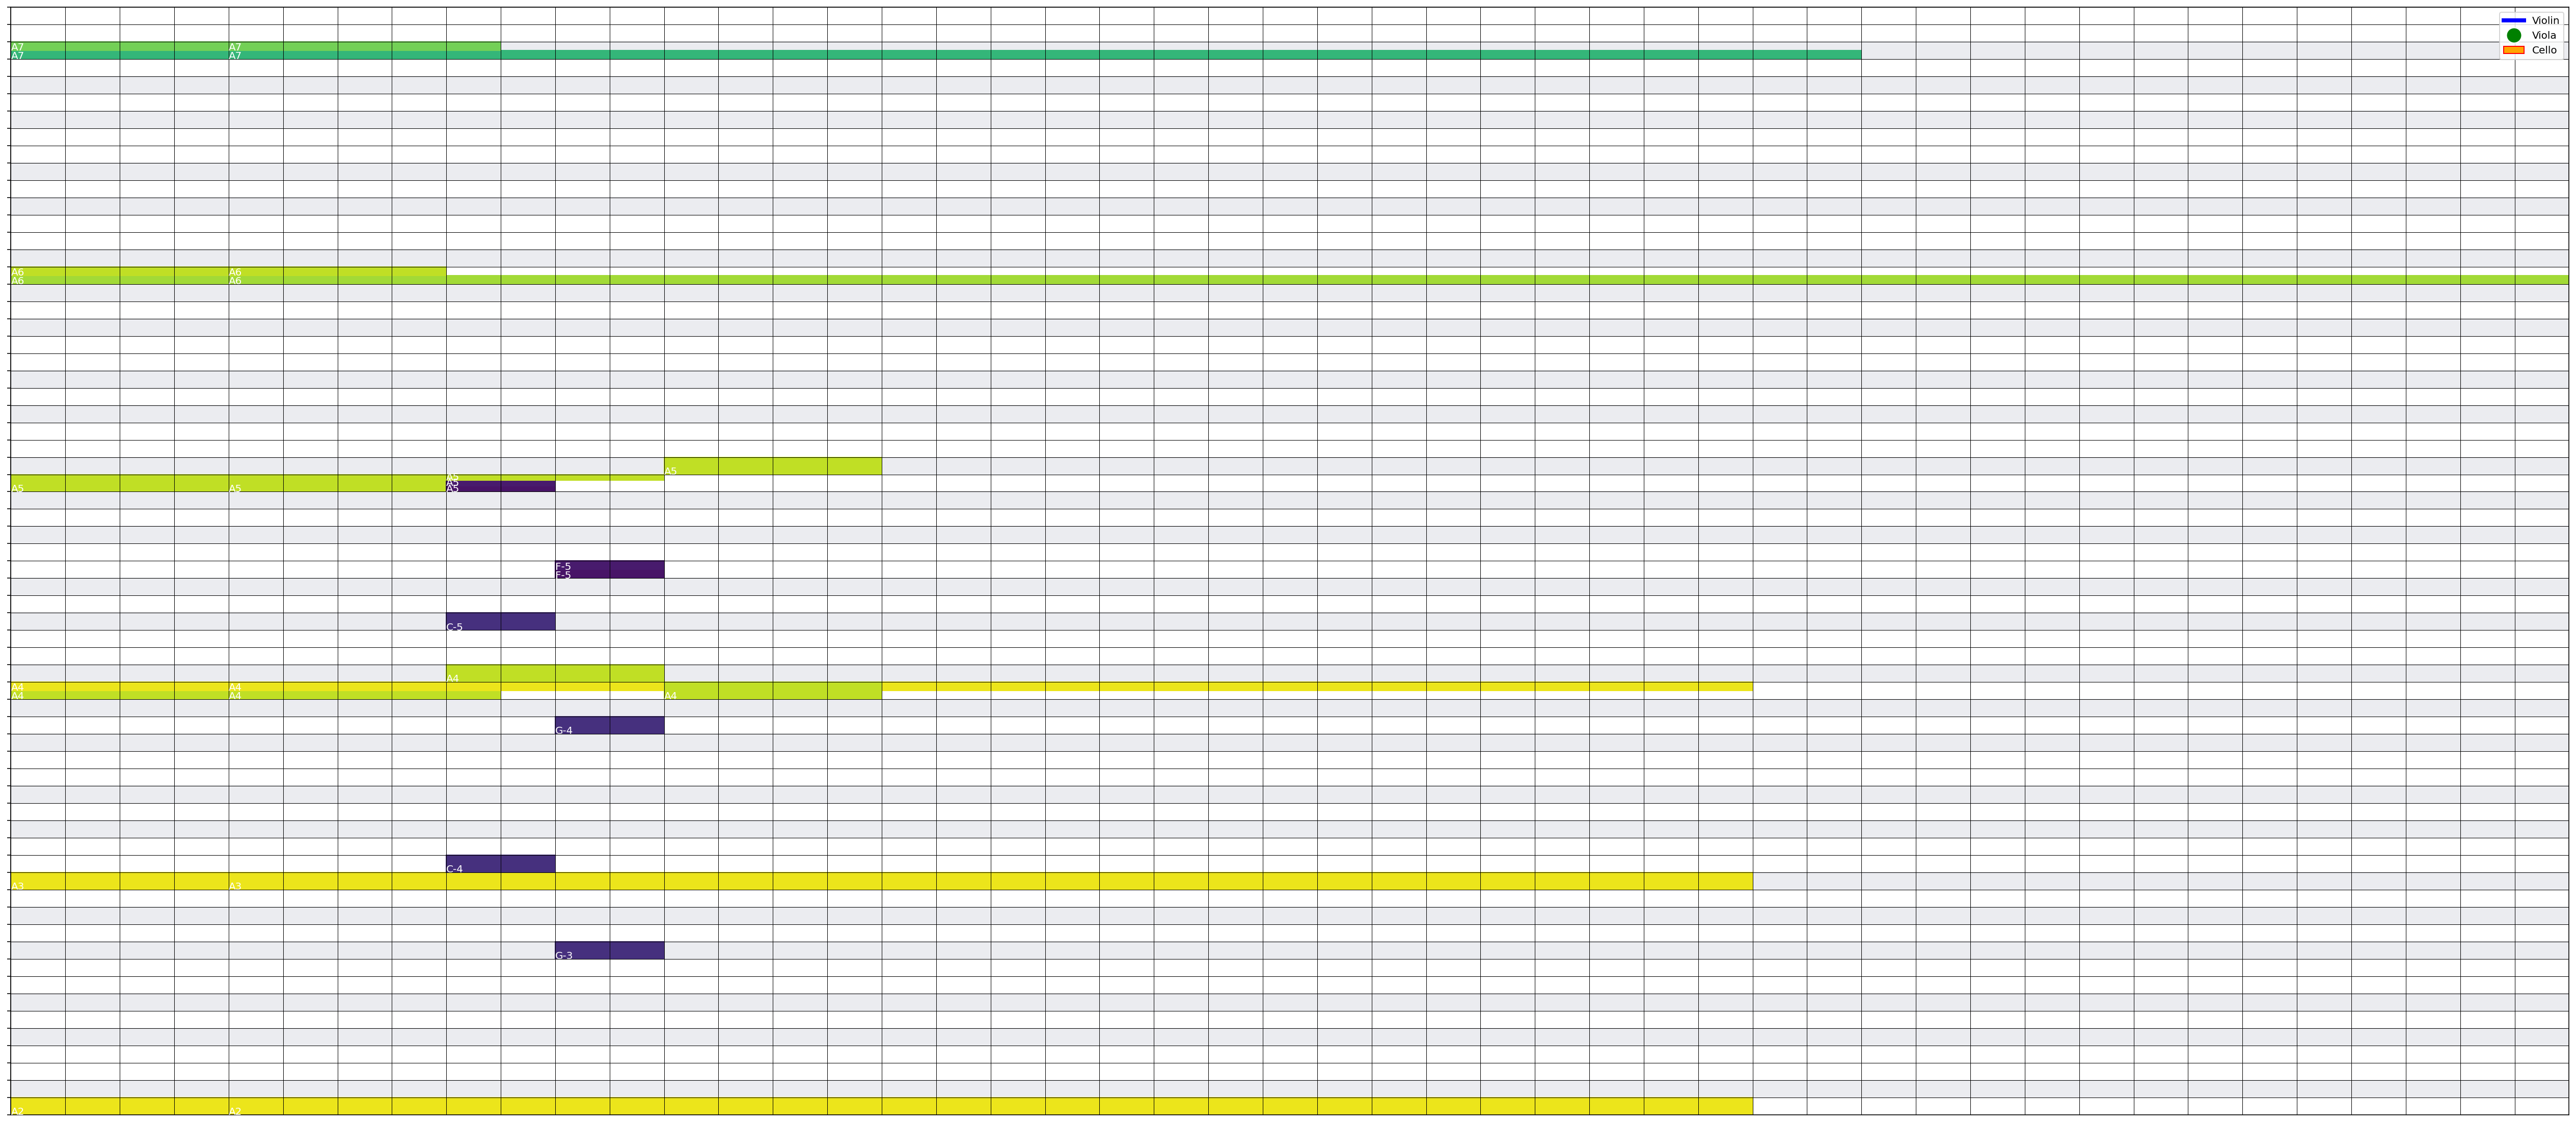

In [169]:
visualizeScore(M1Data, 0, 5)

In [ ]:
x_limit = 40
y_limit = 80

x1, y1 = [-1, 12], [1, 1]

#plt.plot(x1, y1)

fig, (ax) = plt.subplots(1, 1, figsize=(45, 10))

#ax.set_xticks(range(int(x_limit)))
#ax.set_yticks(range(int(y_limit)))
#[ax.xaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(x_limit))]
#[ax.yaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(y_limit))]
ax.set_yticklabels([])
ax.set_xticklabels([])
#ax.grid(color='k', linestyle='-', linewidth=.5)
#ax.tick_params(axis = "both", which = "both", bottom = False, top = False)

line = matplotlib.lines.Line2D([0, 1.5], [0, 2.5],
                    lw=2, color='black', axes=ax)
ax.add_line(line)

plt.xlim(0, 40), plt.ylim(-2, 80)
